<h1>Grosjean et al. experiment</h1>

In [1]:
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean

In [2]:
def noise(s):
    rand = random.uniform(0.001, 0.999)
    return s * math.log((1 - rand)/rand)

In [3]:
def time_to_pulses(time, t_0 = 0.011, a = 1.1, b = 0.015):
    pulses = 0
    pulse_duration = t_0
    while time >= pulse_duration:
        time = time - pulse_duration
        pulses += 1
        pulse_duration = a * pulse_duration + noise(b * a * pulse_duration)
    return pulses

In [4]:
def pulses_to_time(pulses, t_0 = 0.011, a = 1.1, b = 0.015):
    time = 0
    pulse_duration = t_0
    while pulses > 0:
        time = time + pulse_duration
        pulses = pulses - 1
        pulse_duration = a * pulse_duration + noise(b * a * pulse_duration)
    return time

Function for "Lengthened" graph. "rt" represents the list that response times are saved and "pulses" is a list that contains every pulse calculated in each trail.

In [5]:
def lengthened():
    pulses = []
    rt = []
    for i in range(16):
        if i == 15:
            # converts time to pulses. For trail 16, 467 ms is used as stimulus time.
            pulse = time_to_pulses(0.467)
            pulses.append(pulse)
            # calculates expectation by taking the mean of the pulses saved (for trial n, it calulates the average pulse
            # pulse_1 + ... pulse_n-1 and converts it to the time by using pulses_to_time() function).
            expectation = pulses_to_time(mean(pulses[:i]))
            # stimulus is actually 467 ms, but I thought that it is a more convenient way to convert is to pulse and then again
            # to time since model only saves the pulses, not the time.
            stimulus = pulses_to_time(pulse)
            # preparation is calculated as absolute value of difference between expectation (average of previous pulses) and
            # stimulus.
            preparation = abs(expectation-stimulus)
            if expectation < stimulus:
                if preparation > 0.05:
                    # if expectation is before compared to stimulus and preparation is bigger than 50 ms, response_time is 0.41
                    # (default reaction time) - 50 ms.
                    response_time = 0.41 - 0.05
                else:
                    # if expectation is before compared to stimulus and preparation is smaller than 50 ms, response_time is 0.41
                    # (default reaction time) - preparation.
                    response_time = 0.41 - preparation
                rt.append(response_time)
            # if expectation is after compared to stimulus, there is no preparation, hence response_time is 0.41
            # (default reaction time).
            else:
                rt.append(0.41)
        else:
            # this part is for the trials 1-15. 350 ms is used as stimulus time.
            pulse = time_to_pulses(0.35)
            pulses.append(pulse)
            stimulus = pulses_to_time(pulse)
            if i == 0:
                # since there is no prior trail at this moment, expectation is calculated by the current pulse.
                expectation = pulses_to_time(mean(pulses))
            else:
                expectation = pulses_to_time(mean(pulses[:i]))
            preparation = abs(expectation-stimulus)
            if expectation < stimulus:
                if preparation > 0.05:
                    response_time = 0.41 - 0.05
                else:
                    response_time = 0.41 - preparation
                rt.append(response_time)
            else:
                rt.append(0.41)

    return rt

Function for "Shortened" graph.

In [6]:
def shortened():
    pulses = list()
    rt = list()
    for i in range(16):
        # For trail 16, 467 ms is used as stimulus time.
        if i == 15:
            pulse = time_to_pulses(0.467)
            pulses.append(pulse)
            expectation = pulses_to_time(mean(pulses[:i]))
            stimulus = pulses_to_time(time_to_pulses(0.467))
            preparation = abs(expectation-stimulus)
            if expectation < stimulus:
                if abs(expectation - stimulus) > 0.05:
                    response_time = 0.41 - 0.05
                else:
                    response_time = 0.41 - abs(expectation - stimulus)
                rt.append(response_time)
            else:
                rt.append(0.41)
        # this part is for the trials 1-15. 700 ms is used as stimulus time.
        else:
            pulse = time_to_pulses(0.7)
            pulses.append(pulse)
            stimulus = pulses_to_time(time_to_pulses(0.7))
            if i == 0:
                expectation = pulses_to_time(mean(pulses))
            else:
                expectation = pulses_to_time(mean(pulses[:i]))
            preparation = abs(expectation-stimulus)
            if expectation < stimulus:
                if preparation > 0.05:
                    response_time = 0.41 - 0.05
                else:
                    response_time = 0.41 - preparation
                rt.append(response_time)
            else:
                rt.append(0.41)
                
    return rt

Function for "Constant" graph.

In [7]:
def constant():
    pulses = list()
    rt = list()
    # For all trials, 467 ms used as stimulus time.
    for i in range(16):
        pulse = time_to_pulses(0.467)
        pulses.append(pulse)
        stimulus = pulses_to_time(time_to_pulses(0.467))
        if i == 0:
            expectation = pulses_to_time(mean(pulses))
        else:
            expectation = pulses_to_time(mean(pulses[:i]))
        preparation = abs(expectation-stimulus)
        if expectation < stimulus:
            if preparation > 0.05:
                response_time = 0.41 - 0.05
            else:
                response_time = 0.41 - preparation
            rt.append(response_time)
        else:
            rt.append(0.41)

    return rt

trials() function runs trials (1-16) for subjects, then it takes the average of response times in each trail for each subject (e.g. by summing response times from trial #x for each subject and dividing it to # of subjects). It only returns the average of trials 6-16 for plotting as in the paper.

In [8]:
def trials(subjects, experiment_type="constant"):
    dic = dict()
    lst = list()
    
    for i in range(subjects):
        if experiment_type == "lengthened":
            rt = lengthened()
        elif experiment_type == "shortened":
            rt = shortened()
        else:
            rt = constant()
        
        for i, r in enumerate(rt):
            if i in dic.keys():
                dic[i] += r/subjects
            else:
                dic[i] = r/subjects
                
    for key, value in dic.items():
        lst.append(value)

    return lst[-11:]

plot() function plots the graph for each experiment namely "Lengthened", "Shortened" and "Constant".

In [9]:
def plot(y_coordinates, title, x_coordinates = [i for i in range (6, 17)]):
    plt.title(title)
    
    plt.xlabel("Number of trials")
    plt.ylabel("Response time (sec)")
    
    plt.ylim((0.35, 0.42))
    
    plt.scatter(x_coordinates, y_coordinates)
    plt.plot(x_coordinates, y_coordinates)

Graph for "Lengthened" for 1000 subjects.

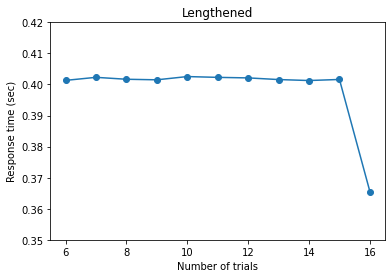

In [10]:
plot(trials(1000, "lengthened"), "Lengthened")

Graph for "Shortened" for 1000 subjects.

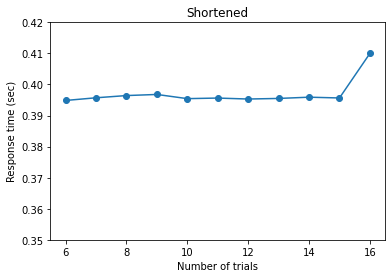

In [11]:
plot(trials(1000, "shortened"), "Shortened")

Graph for "Constant" for 1000 subjects.

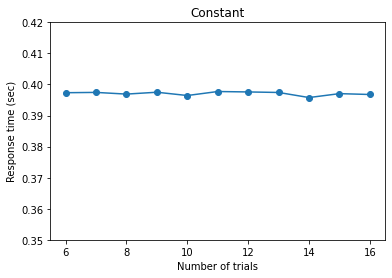

In [12]:
plot(trials(1000), "Constant")

I realized that in my each graph, for the parts that should be kind of constant (for the first 6-15 trials, reaction time is around 0.37 sec for each graph in the lecture slides and the paper), mines are around 0.39-0.4 sec. I believe that my graphs still represents/replicates the findings in the paper even though better fit for the results might have been achieved. I could not find a generic way to achieve that instead of subtracting 50 ms from the expectation by default before calculating the reaction time, which if I do, I am getting better fit actually, but by hardcoding. So, I left this option out. One interesting way to achieve that might be saving preparation time for each trial, and subtracting it from the expectation of next trail beforehand (e.g. for trial n, reaction time would be *reaction_time = 0.41 - preparation_n - preparation_n-1* if expectation is before stimulus and preparation is smaller than 50 ms. This approach is also applicable for other conditions). Due to an error I got, I could not include that part in the code.